In [1]:
import pandas as pd
import scipy.stats as sts
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn.preprocessing import StandardScaler


In [2]:
sample_info = pd.read_csv('../data/sample_info.csv')
radiosensitivity = pd.read_csv('../data/radiosensitivity.csv')
expression = pd.read_csv('../data/expressionData.csv')


In [4]:
data = pd.merge(expression, radiosensitivity, on='cell_line_name', how='inner')
data.dtypes.value_counts()

float64    19226
object         1
dtype: int64

In [5]:
data = data.drop(columns=['cell_line_name'])
data = data.drop(columns=['R2', 'AUC', 'alpha', 'beta'])

In [7]:
y = data['SF2']
X = data.drop(columns=['SF2',])
X.dtypes.value_counts()

float64    19221
dtype: int64

In [9]:
list = []

count = 0
for var in X.columns:
    if X[var].nunique() > 1:
        spearmanr_corr, spearmanr_pvalue = sts.spearmanr(X[var], y)
        if  abs(spearmanr_corr) > (0.15):
            if (spearmanr_pvalue) < (0.05):
                count += 1
                list.append(var)


count2 = 0
for var2 in X.columns:
    if  X[var2].nunique() > 1:
        pearsonr_corr, pearsonr_pvalue = sts.pearsonr(X[var2], y)
        if abs(pearsonr_corr) > (0.15):
            if (pearsonr_pvalue) < (0.05):
                count2 += 1
                if var2 not in list:
                    list.append(var2)
print(len(list), "variables according to Pearson's r and Spearman Rank correlation were correlated to the Sensitivity")


1243 variables according to Pearson's r and Spearman Rank correlation were correlated to the Sensitivity


In [10]:
X = pd.DataFrame(X[list])

In [11]:
from sklearn.decomposition import PCA
#tmp = data.drop(columns=['cell_line_name', 'Sensitivity', 'sf2_scaled', 'SF2', 'primary_or_metastasis', 'primary_disease', 'lineage'])

pca = PCA()
data_pca = pd.DataFrame(pca.fit_transform(X), 
                        columns=['PCA%i' % i for i in range(1, pca.n_components_ + 1)], index=X.index)

In [12]:
data_pca

,PCA1,PCA2,PCA3,PCA4,PCA5,PCA6,PCA7,PCA8,PCA9,PCA10,...,PCA452,PCA453,PCA454,PCA455,PCA456,PCA457,PCA458,PCA459,PCA460,PCA461
0,29.396252,-7.856814,0.339822,3.885928,2.934570,0.042635,-4.309895,-2.656063,-0.380241,-8.575012,...,-0.018228,0.055162,0.169449,0.043245,-0.110684,-0.074726,-0.012463,-0.063246,0.032563,1.150192e-14
1,-11.614823,-18.568895,-1.036332,-1.502775,-2.740393,-0.968048,3.379595,2.698664,4.320195,-6.170047,...,0.045102,-0.198308,-0.006980,0.010092,0.353746,0.037714,-0.018482,-0.172328,0.187320,1.150192e-14
2,-2.678786,-6.776522,11.971206,1.303376,-8.670210,13.357011,-7.808678,-3.993594,-0.005760,5.634561,...,-0.043368,-0.087363,-0.680551,-0.029873,0.070742,0.493177,0.008206,0.367041,0.059799,1.150192e-14
3,47.728704,-7.691620,-5.900833,23.763650,4.775878,-4.543441,-2.067319,10.505613,12.424305,2.993799,...,0.007297,0.023096,-0.021708,-0.001860,0.023158,-0.006961,-0.008061,0.005095,-0.020532,1.150192e-14
4,1.928122,-6.475274,2.249558,-5.399343,6.027369,-0.800870,-2.892313,3.796299,-1.203653,0.664221,...,-0.048638,0.087979,-0.331983,-0.003950,-0.187954,-0.085234,-0.000808,0.229240,0.133161,1.150192e-14
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
456,4.859518,17.250782,12.544601,-2.557858,-2.211450,-1.156786,-1.190332,0.982099,7.917157,-3.626629,...,-0.565197,-0.027754,-0.157112,-0.428949,0.076592,-0.485911,-0.069203,0.228156,0.284054,1.150192e-14
457,-15.613796,-13.242214,6.879606,3.504971,-7.393117,-1.577604,4.249693,0.273189,0.630393,-5.008643,...,0.296932,-0.119739,0.230623,0.027746,0.107495,0.206363,-0.134353,-0.189022,-0.118613,1.150192e-14
458,6.696659,1.806981,1.443006,-9.988791,7.629755,0.928081,-3.492624,-5.849517,-3.371167,-3.260584,...,-0.258558,0.107827,0.107236,-0.094049,0.075979,0.033499,0.202007,0.166980,0.115128,1.150192e-14
459,7.852622,13.784983,2.915261,-7.024287,-4.389052,-1.062875,-1.008769,2.341839,11.506956,-3.849293,...,0.041308,-0.023323,0.119620,0.029395,-0.246149,0.021475,0.241011,-0.255946,0.004144,1.150192e-14


In [13]:
sc = StandardScaler()
radiosensitivity['sf2_scaled'] = sc.fit_transform(np.asarray(radiosensitivity['SF2']).reshape(-1,1))

std = radiosensitivity['sf2_scaled'].std()
mean = radiosensitivity['sf2_scaled'].mean()

# The outcome variable sf2_scaled is converted to categories based on their numeric value for later prediction

for i in range(radiosensitivity.shape[0]):
    if radiosensitivity.at[i, 'sf2_scaled'] < mean - std * 0.8:
        radiosensitivity.at[i, 'Sensitivity'] = 'sensitive'
    elif radiosensitivity.at[i, 'sf2_scaled'] > mean + std * 0.8:
        radiosensitivity.at[i, 'Sensitivity'] = 'resistant'
    else:
        radiosensitivity.at[i, 'Sensitivity'] = 'intermediate'

In [14]:
data_pca = pd.concat([radiosensitivity['Sensitivity'], data_pca], axis=1).drop(radiosensitivity[radiosensitivity.Sensitivity == 'intermediate'].index)

In [16]:
for i in range(20):
    print(f"PCA{i+1}: {pca.explained_variance_ratio_[i]:.4f}")
n=20
print(f"Cumulative explained variance by first {n} PCAs: {pca.explained_variance_ratio_[:n].sum():.4f}")

PCA1: 0.1716
PCA2: 0.0728
PCA3: 0.0455
PCA4: 0.0396
PCA5: 0.0309
PCA6: 0.0273
PCA7: 0.0246
PCA8: 0.0187
PCA9: 0.0184
PCA10: 0.0165
PCA11: 0.0121
PCA12: 0.0120
PCA13: 0.0116
PCA14: 0.0105
PCA15: 0.0098
PCA16: 0.0094
PCA17: 0.0087
PCA18: 0.0086
PCA19: 0.0084
PCA20: 0.0079
Cumulative explained variance by first 20 PCAs: 0.5647


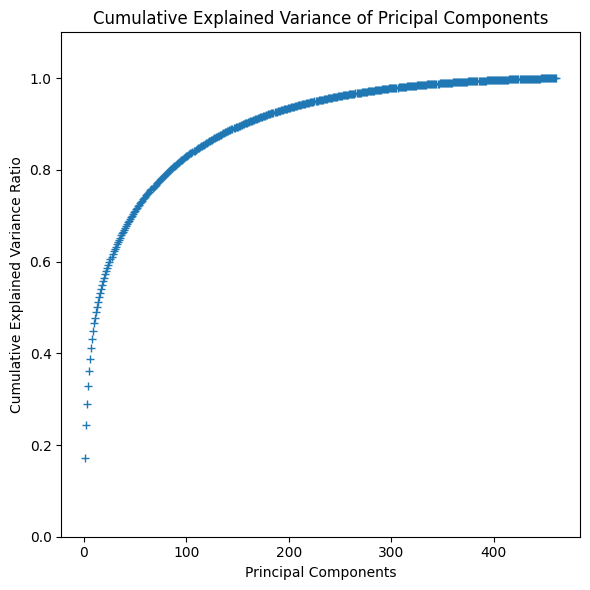

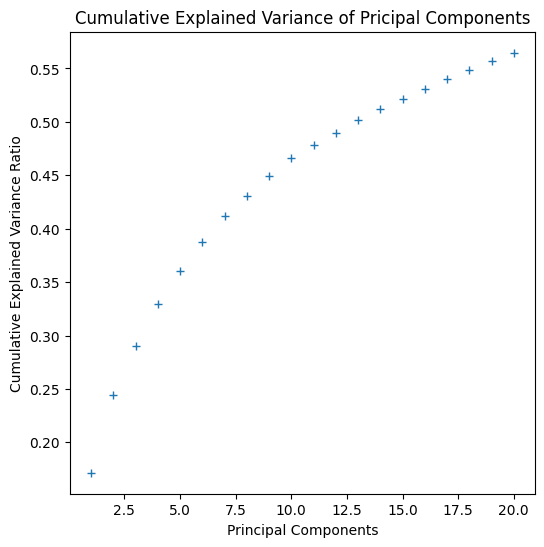

In [17]:
fig, ax = plt.subplots(1,1, figsize=(6,6))
pca_cum_variance_ratio = np.cumsum(pca.explained_variance_ratio_)
ax.plot(
    np.arange(1, pca.n_components_ + 1), pca_cum_variance_ratio, "+", linewidth=2
)
ax.set(title='Cumulative Explained Variance of Pricipal Components',
       xlabel='Principal Components',
       ylabel="Cumulative Explained Variance Ratio",
       ylim= [0,1.1])


# ax.axvline(
#     n,
#     linestyle=":", color='red',
#     label="n_components chosen",
# )
# ax.legend(prop=dict(size=12))
plt.tight_layout()
plt.savefig('../presentation/figures/PCA_variance_explained_with_filter.pdf')
plt.show()

fig, ax = plt.subplots(1,1, figsize=(6,6))
ax.plot(
    np.arange(1, n+1), pca_cum_variance_ratio[:n], "+", linewidth=2
)
ax.set(title='Cumulative Explained Variance of Pricipal Components',
       xlabel='Principal Components',
       ylabel="Cumulative Explained Variance Ratio")

plt.show()
